### **Regression models**
A ***model*** for an output feature, y, using input feature(s), X, is a function f(X) that predicts an expected value of y for a given value of X as y = f(X). So y^ is the predicted value for the output feature y for a given value of the input feature X. Specifically, a ***regression model*** is a model that uses numeric output features. Visually, a regression model for data graphed on a scatter plot traces out a line or a nonlinear curve.

If two features have a strong relationship, predicted values should be close to the observed values. Closeness can be seen visually by comparing points to the graph of the model. Closeness can be measured numerically using residuals. The ***residual*** of an instance (xi, yi) is the difference between the observed and predicted value (yi - y^i). A well-fitting model should have small residuals on average.

A model is also used to make predictions about values aside from what was observed. Predictions should only be made for values close to the range of the original data. An ***extrapolation*** is a prediction for a value far beyond the range of the original data and is often misleading or inaccurate.

---

### **Simple Linear Regression**

The simplest regression model for a pair of numeric features (x,y) is to consider a model that predicts the output feature y for a given input feature x using a line graphed in the scatter plot. A simple linear regression is a mathematical model of the form y^ = b0 + b1x, where:

- x is the input feature.
- y^ is the predicted value of the output feature y for a given value of x.
- b0 is the y-intercept, representing the predicted value of y when x=0.
- b1 is the slope, representing how much the predicted value of y changes for a one-unit change in the value of x.

#### **The least-squares regression line**

The values of b0 and b1 should be chosen so that the predictions y^i are as close as possible, on average, to the observed values yi. A common method to compute regression coefficients is to minimize some mathematical combination of the residuals. The sum of squared errors (SSE) is the sum of the squares of all residuals and can be found by the formula (sum of residuals)^2. A least-squares regression line is a simple linear regression 
y^ = b0 + b1x that minimizes the sum of squared errors.

How well the simple linear regression line models the data can be measured by how much closer the predictions from the regression line are to the observed values compared to predictions from a model that assumes no relationship exists between x and y. Such a "no-relationship" model would be a horizontal line model y^ = y- that returns the mean y- for every value of x. The proportion of variation explained by a simple linear regression is given by the equation (SSE(y-) - SSE(regression line))/SSE(y-)


#### **The correlation coefficient r and least-squares regression**
Above, the least-squares regression was given, but was using a simple linear model appropriate in the first place? If so, how were the coefficients computed? The answer to both questions involve the scatter plot and the data's summary statistics. A simple linear regression should only be used as a model when the scatter plot of ***(x,y)*** displays a strong linear form. The linearity must be visually confirmed, but the strength can be checked numerically.

The ***correlation coefficient*** ***r*** measures the direction and strength of a linear relationship as a unitless value between -1 and 1, and can be computed by a formula.

A large positive ***r*** value indicates a positive linear association, and a large negative ***r*** value indicates a negative linear association.

If a simple linear regression is appropriate, the slope b1 and intercept b0 of the least-squares regression can be computed from the correlation coefficient. Furthermore, the proportion of variation explained by the least-squares regression is equal to r squared

In [4]:
# Import packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression

In [5]:
# Import data
data = {
    'site': ['GTM', 'SI', 'NIB', 'ZI', 'RC', 'VCR', 'DB', 'JC', 'CT', 'NB', 'CC', 'BC', 'PIE'],
    'latitude': [30.0, 31.4, 33.3, 34.0, 34.7, 37.2, 39.1, 39.6, 41.3, 41.6, 41.9, 42.2, 42.7],
    'n': [28, 30, 30, 35, 25, 30, 30, 30, 33, 29, 27, 37, 28],
    'mean_mm': [12.40, 9.85, 13.30, 12.10, 12.50, 16.30, 15.60, 15.30, 14.70, 17.10, 16.80, 16.20, 18.50],
    'min_mm': [7.55, 6.64, 8.52, 8.05, 9.40, 11.70, 11.50, 9.58, 11.00, 13.20, 10.60, 9.01, 9.92],
    'max_mm': [14.9, 13.6, 17.3, 15.7, 17.6, 21.4, 20.4, 20.9, 19.5, 21.9, 19.8, 23.4, 22.1],
    'sd_mm': [1.80, 1.79, 2.42, 2.01, 2.34, 2.94, 2.12, 2.72, 2.36, 2.29, 2.05, 4.81, 2.30],
    'median_mm': [12.60, 9.55, 13.30, 12.00, 12.10, 16.00, 15.10, 15.40, 15.50, 17.20, 16.70, 17.30, 18.40],
    'date': ['2016-07-24', '2016-07-26', '2016-07-28', '2016-07-29', '2016-08-01', '2016-08-09', 
             '2016-08-07', '2016-08-08', '2016-08-09', '2016-07-28', '2016-07-25', '2016-08-12', '2016-08-13']
}

crabs = pd.DataFrame(data)
# Store relevant columns as variables
X = crabs[['latitude']].values.reshape(-1, 1)
y = crabs[['mean_mm']].values.reshape(-1, 1)

Text(0, 0.5, 'Mean length (mm)')

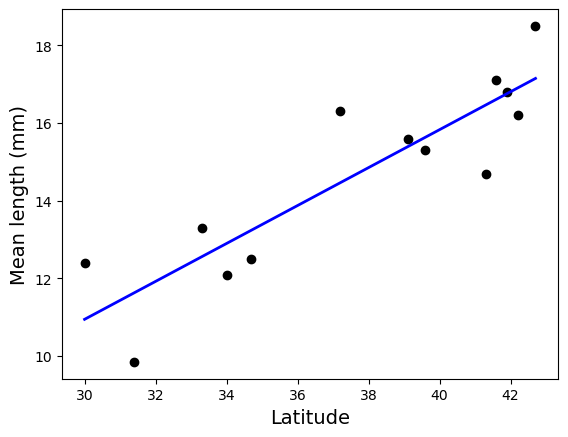

In [6]:
# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Graph the model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Mean length (mm)', fontsize=14)

Text(0, 0.5, 'Mean length (mm)')

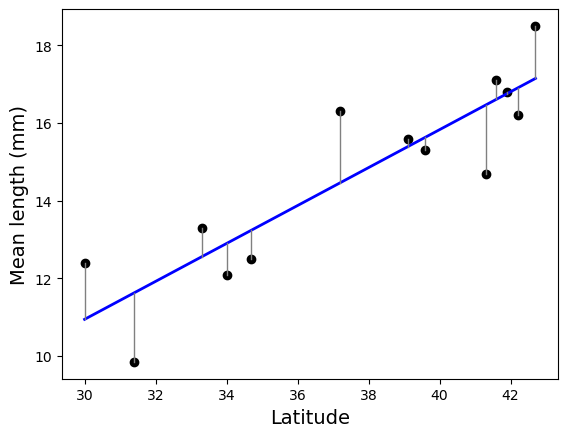

In [7]:
# Graph the residuals
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=2)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], yPredicted[i]], color='grey', linewidth=1)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Mean length (mm)', fontsize=14)

In [8]:
# Output the intercept of the least squares regression
intercept = linModel.intercept_
print(intercept[0])

-3.7039348302831687


In [9]:
# Output the slope of the least squares regression
slope = linModel.coef_
print(slope[0][0])

0.4883459157334994


In [10]:
# Write the least squares model as an equation
print("Predicted mean length = ", intercept[0], " + ", slope[0][0], "* (latitude)")

Predicted mean length =  -3.7039348302831687  +  0.4883459157334994 * (latitude)


In [11]:
# Compute the sum of squared errors for the least squares model
SSEreg = sum((y - yPredicted) ** 2)[0]
SSEreg

16.231931026452145

In [12]:
# Compute the sum of squared errors for the horizontal line model
SSEyBar = sum((y - np.mean(y)) ** 2)[0]
SSEyBar

72.94692307692308

In [13]:
# Compute the proportion of variation explained by the linear regression
# using the sum of squared errors
(SSEyBar - SSEreg) / (SSEyBar)

0.7774829925405428

In [14]:
# Compute the correlation coefficient r
r = r_regression(X, np.ravel(y))[0]
r

0.8817499603291902

In [15]:
# Compute the proportion of variation explained by the linear regression
# using correlation coefficient
r**2

0.7774829925405284

In [16]:
# Compute the proportion of variation explained by the linear regression
# using the LinearModel object's score method
linModel.score(X, y)

0.7774829925405428

---

### **Linear Regression Assumptions**

Model assumptions
A simple linear regression can be computed for any pair of numeric features, but the resulting line is not necessarily a good fit for the relationship between those features. A simple linear regression makes certain assumptions about the relationship between the features x and y. Particularly, a simple linear regression model y^ = b0 + b1x assumes:

- x and y have a linear relationship.
- The residuals of the observations are independent.
- The mean of the residuals is 0 and the variance of the residuals is constant.
- The residuals are approximately normally distributed.
Judging whether x and y have a linear relationship is the first step taken before conducting simple linear regression and can be carried out by checking whether the scatter plot of x and y shows a linear form.

#### **Residual Plots with Python**

In [17]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [18]:
# Store relevant columns as variables
X = crabs[['latitude']].values.reshape(-1, 1)
y = crabs[['mean_mm']].values.reshape(-1, 1)

In [19]:
# Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X, y)

LinearRegression()

Text(0, 0.5, 'Mean length (mm)')

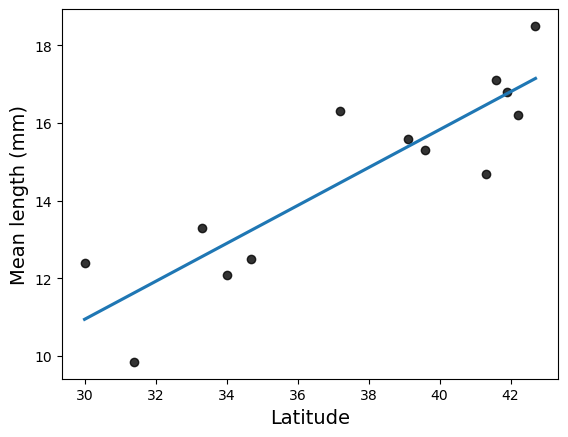

In [20]:
# regplot() creates a scatter plot with the regression line overlaid
p = sns.regplot(data=crabs, x='latitude', y='mean_mm', ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Latitude', fontsize=14)
p.set_ylabel('Mean length (mm)', fontsize=14)

In [21]:
# Calculate predicted values and residuals
yPredicted = linModel.predict(X)
yResid = yPredicted - y

Text(0.5, 1.0, 'Fitted value vs. residual plot')

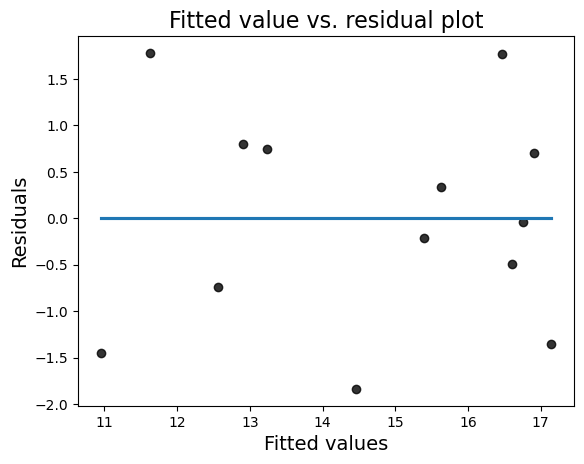

In [22]:
# Scatter plot with predicted values vs. residuals
# Points should be scattered around a horizontal line at y=0 with no obvious pattern
p = sns.regplot(x=yPredicted, y=yResid, ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Fitted values', fontsize=14)
p.set_ylabel('Residuals', fontsize=14)
p.set_title('Fitted value vs. residual plot', fontsize=16)

Text(0, 0.5, 'Sample quantiles')

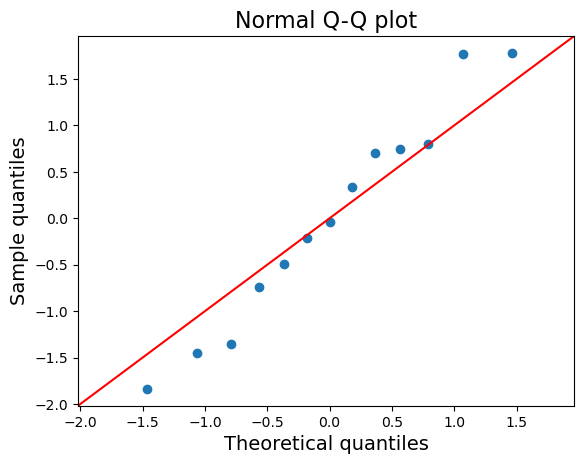

In [23]:
# Residuals must be stored as a flattened array
resid = np.ravel(yResid)

# Use qqplot() from statsmodels to make a QQ plot
p = sm.qqplot(resid, line='45')

plt.title('Normal Q-Q plot', fontsize=16)
plt.xlabel('Theoretical quantiles', fontsize=14)
plt.ylabel('Sample quantiles', fontsize=14)

---

## **Multiple Linear Regression**

Often, a datasent has multiple input features, each of which could be used individually for simple linear regression. One way to build a better regression model is to incorporate mroe than one input feature into a single regression equation. A ***multiple linear regression*** is a mathematical model of the form y^ = b0 + b1x1 + ... bkxk, in which:

- x1, ..., xk are input features.
- y^ is the predicted value of the output feature y for given values x1, ..., xk
- b0 is the y-intercept, representing the predicted value of y when all input features equal zero (x1 = ... + xk = 0).
- b1,...,bk are the slopes, representing how much of the predicted value of y changes per a one-unit increase in the associated input feature when all other features are held constant.

Selecting which features to use in a multiple linear regression generally requires a method of model evaluation to ensure that only relevant input features are included.


#### **Polynomial Regression**

A polynomial regression can be considered using multiple input features. A ***polynomial regression*** is a mathematical model of input features that includes all powers and interaction terms of the input features up to a fixed degree. An ***interaction term*** is a term in a regression model that contains multiple input features, such as (x1^3 x2). Interaction terms are included to reflect how the prediction changes in non-additive ways as the features vary. The degree of an interaction term is the sum of the powers on the term. Ex: (x1^3 x2) is a degree 4 interaction term. Interactive terms can account for dependency between input features.

The general equation of a multiple polynomial equation is cumbersome to write but can be easily displayed for a small degree. Ex: A degree 2 (quadratic) polynomial regression on two input features has the form 
y^ = b0 + b1x1 + b2x2 + b3x1^2 + b4x1x2 + b5x2^2.

Like simple polynomial regression, the function used for the regression is not linear, but the regression is said to be linear with respect to the powers and interaction terms.

Example:

    MPG^ = 78.32 
    - 1.6(Acceleration) 
    - .02(Weight)
    + .04(Acceleration)^2
    + .0002(Acceleration)(Weight) <- Interaction Term
    + .0000000002(Weight)^2


#### **Multiple Linear Regression in Python**

In [24]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d

In [25]:
# Load the dataset
mpg = pd.read_csv('/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/auto-mpg.csv')

# Remove rows that have missing fields
mpg = mpg.dropna()

# Store relevant columns as variables
X = mpg[['acceleration', 'weight']].values.reshape(-1, 2)
y = mpg[['mpg']].values.reshape(-1, 1)

Text(0, 0.5, 'MPG')

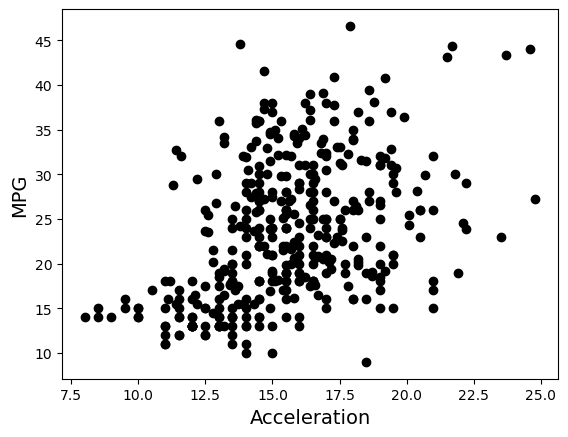

In [26]:
# Graph acceleration vs MPG
plt.scatter(X[:, 0], y, color='black')
plt.xlabel('Acceleration', fontsize=14)
plt.ylabel('MPG', fontsize=14)

Text(0, 0.5, 'MPG')

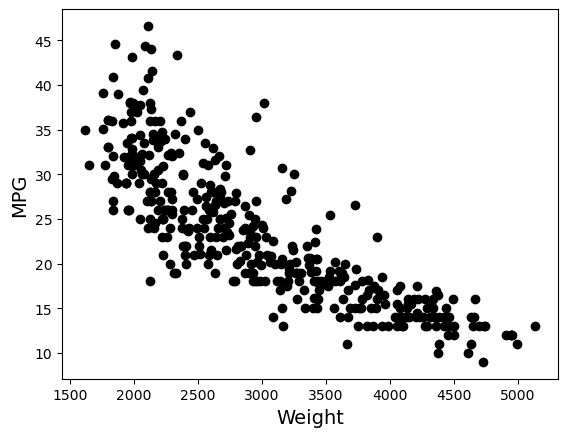

In [27]:
# Graph weight vs MPG
plt.scatter(X[:, 1], y, color='black')
plt.xlabel('Weight', fontsize=14)
plt.ylabel('MPG', fontsize=14)

In [28]:
# Fit a least squares multiple linear regression model
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print(
    "Predicted MPG = ",
    linModel.intercept_[0],
    " + ",
    linModel.coef_[0][0],
    "* (Acceleration)",
    " + ",
    linModel.coef_[0][1],
    "* (Weight)",
)

Predicted MPG =  41.39982830200015  +  0.2508158929112356 * (Acceleration)  +  -0.007335644801695245 * (Weight)


(28.0, 9.0)

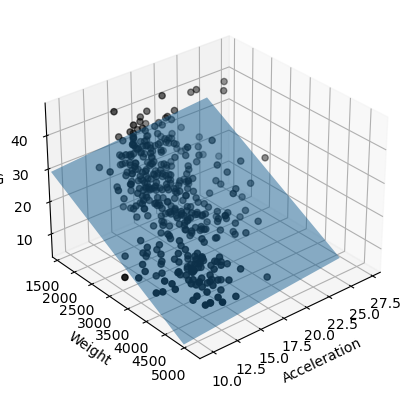

In [29]:
# Set up the figure
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the points
ax.scatter3D(X[:, 0], X[:, 1], y, color="Black")
# Plot the regression as a plane
xDeltaAccel, xDeltaWeight = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 2),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 2),
)
yDeltaMPG = (
    linModel.intercept_[0]
    + linModel.coef_[0][0] * xDeltaAccel
    + linModel.coef_[0][1] * xDeltaWeight
)
ax.plot_surface(xDeltaAccel, xDeltaWeight, yDeltaMPG, alpha=0.5)
# Axes labels
ax.set_xlabel('Acceleration')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
# Set the view angle
ax.view_init(30, 50)
ax.set_xlim(28, 9)

In [30]:
# Make a prediction
yMultyPredicted = linModel.predict([[20, 3000]])
print(
    "Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds \n",
    "using the multiple linear regression is ",
    yMultyPredicted[0][0],
    "miles per gallon",
)

Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds 
 using the multiple linear regression is  24.409211755139133 miles per gallon


Predicted MPG =  62.51665222195055  +  -0.01864232429057637 * (Weight)  +  1.7165267866739392e-06 * (Weight)^2


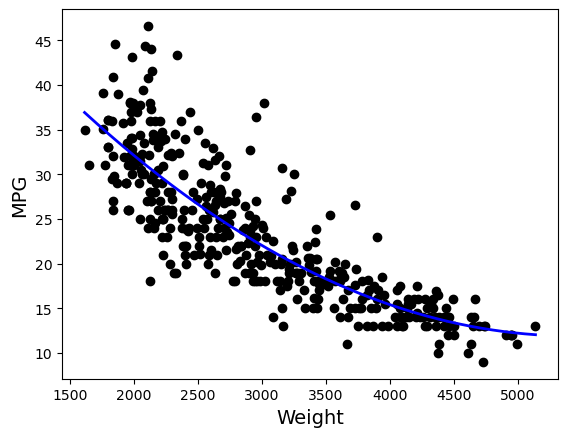

In [32]:
# Store weight as an array
X2 = X[:, 1].reshape(-1, 1)

# Fit a quadratic regression model using just Weight
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X2)
polyModel = LinearRegression()
polyModel.fit(xPoly, y)

# Graph the quadratic regression
plt.scatter(X2, y, color='black')
xDelta = np.linspace(X2.min(), X2.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('MPG', fontsize=14)

# Write the quadratic model as an equation
print(
    "Predicted MPG = ",
    polyModel.intercept_[0],
    " + ",
    polyModel.coef_[0][0],
    "* (Weight)",
    " + ",
    polyModel.coef_[0][1],
    "* (Weight)^2",
)

In [33]:
# Make a prediction
polyInputs = polyFeatures.fit_transform([[3000]])
yPolyPredicted = polyModel.predict(polyInputs)
print(
    "Predicted MPG for a car with Weight = 3000 pounds \n",
    "using the simple polynomial regression is ", yPolyPredicted[0][0], "miles per gallon",
)

Predicted MPG for a car with Weight = 3000 pounds 
 using the simple polynomial regression is  22.03842043028689 miles per gallon


In [34]:
# Fit a quadratic regression model using acceleration and weight
polyFeatures2 = PolynomialFeatures(degree=2, include_bias=False)
xPoly2 = polyFeatures.fit_transform(X)
polyModel2 = LinearRegression()
polyModel2.fit(xPoly2, y)

# Write the quadratic regression as an equation
print(
    "Predicted MPG =", polyModel2.intercept_[0], "\n",
    " + ", polyModel2.coef_[0][0], "* (Acceleration)\n",
    " + ", polyModel2.coef_[0][1], "* (Weight)", "\n",
    " + ", polyModel2.coef_[0][2], "* (Acceleration)^2 \n",
    " + ", polyModel2.coef_[0][3], "* (Acceleration)*(Weight) \n",
    " + ", polyModel2.coef_[0][4], "* (Weight)^2 \n",
)

Predicted MPG = 79.14117546302137 
  +  -1.6413572191533983 * (Acceleration)
  +  -0.02303155922881992 * (Weight) 
  +  0.044839539176369216 * (Acceleration)^2 
  +  0.00016477098985633585 * (Acceleration)*(Weight) 
  +  2.0623849426732075e-06 * (Weight)^2 



In [35]:
# Make a prediction
polyInputs2 = polyFeatures2.fit_transform([[20, 3000]])
yPolyPredicted2 = polyModel2.predict(polyInputs2)
print(
    "Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds \n",
    "using the polynomial regression is ", yPolyPredicted2[0][0], "miles per gallon",
)

Predicted MPG for a car with acceleration = 20 seconds and Weight = 3000 pounds 
 using the polynomial regression is  23.60289293948035 miles per gallon


---

## **Logistic Regression**

A logistic regression is a model that predicts the probability of an outcome in a binary category using an equation of the form, p^ = (e^(b0+b1x))/(1 + e^(b0)+b1x), where b0 and b1 are values estimated using the data. A logistic regression model graphs an S-shaped curve (a sigmoid). Although a logistic regression model is an example of nonlinear regression, the parameters b0 and b1 play a role similar to the parameters of simple linear regression and use the same names.

- b0 is called the intercept parameter. Unlike linear regression, the b0 is not the y-intercept, but instead determines probability of observing a success when all the input features are 0, or baseline success probability. A positive value of b0 indicates a probability greater than 0.5 while a negative value of b0 indicates a probability less than 0.5.
- b1 is the slope parameter that determines how sharply the logistic curve bends as the value of the input feature increases. A positive slope parameter means the curve will increase from 0 to 1 as the input feature increases, while a negative slope parameter indicates the curve will decrease from 1 to 0 as the input feature increases.

#### **Classification Using a Logistic Regression**

Although more complicated, using nonlinear equations allows a broader class of scenarios to be modeled. One such scenario is classification: a nonlinear regression model can be used to predict the outcome of a categorical feature based on numeric features. In order to do so, categorical features must first be made numeric. ***Hot encoding*** is transforming a categorical feature into numeric feature that equal 0 when an instance is not in the category and 1 when the instance is.

A binary categorical feature hot encoded into a numeric feature p can be interpreted as a probability where the outcomes are either 0% or 100% chance of being in the category. When the predicted probability p^ is greater than some cutoff value, the outcome is predicted to be in the category, otherwise the outcome is predicted to not be in the category. The cutoff value is based on the scenario being modeled, but usually 0.5 is used in classification.

#### **Logistic Regression in Python**

Python can carry out logistic regression by fitting a LogisticRegression() object to (X,y) where X is an array of the observed values of the input feature and y is an array of 0s and 1s representing the binary categorical variable. The parameters and methods for LogisticRegression() can be found in the LogisticRegression documentation:

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

If the categorical variable has not been hot encoded, values can be reassigned from labels to 0 or 1 using pandas DataFrame operations.

The code below fits and graphs a logistic regression model object using the Wisconsin breast cancer data, hot encoding the diagnosis variable along the way. The log-odds linear classifier is also graphed for comparison.

In [36]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [43]:
# Load the Wisconsin Breast Cancer dataset
WBCD = pd.read_csv("/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/WisconsinBreastCancerDatabase.csv")
# Convert Diagnosis to 0 and 1.
WBCD.loc[WBCD['diagnosis'] == 'B', 'diagnosis'] = 0
WBCD.loc[WBCD['diagnosis'] == 'M', 'diagnosis'] = 1
WBCD

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [45]:
# Store relevant columns as variables
X = WBCD[['radius_mean']].values.reshape(-1, 1)
y = WBCD[['diagnosis']].values.reshape(-1, 1).astype(int)

Text(0, 0.5, 'Probability of malignant tumor')

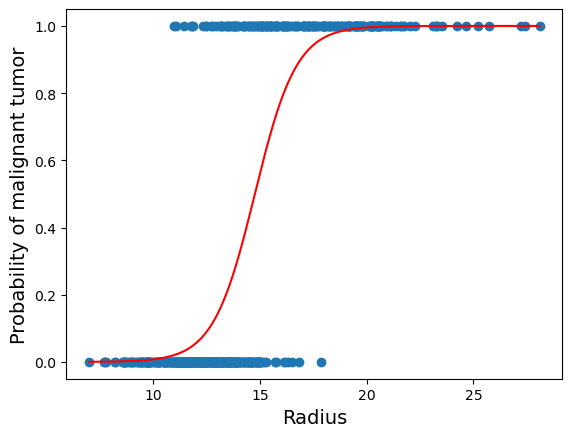

In [46]:
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

# Graph logistic regression probabilities
plt.scatter(X, y)
xDelta = np.linspace(X.min(), X.max(), 10000)
yPredicted = logisticModel.predict(X).reshape(-1, 1).astype(int)
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1, 1))[:, 1]
plt.plot(xDelta, yDeltaProb, color='red')
plt.xlabel('Radius', fontsize=14)
plt.ylabel('Probability of malignant tumor', fontsize=14)

In [47]:
# Display the slope parameter estimate
logisticModel.coef_

array([[1.02475609]])

In [48]:
# Display the intercept parameter estimate
logisticModel.intercept_

array([-15.120902])

In [49]:
# Predict the probability a tumor with radius mean 13 is benign / malignant
pHatProb = logisticModel.predict_proba([[13]])
pHatProb[0]

array([0.85803604, 0.14196396])

In [50]:
# Classify whether tumor with radius mean 13 is benign (0) or malignant (1)
pHat = logisticModel.predict([[13]])
pHat[0]

0

In [51]:
print(
    "A tumor with radius mean 13 has predicted probability: \n",
    pHatProb[0][0],
    "of being benign\n",
    pHatProb[0][1],
    "of being malignant\n",
    "and overall is classified to be benign",
)

A tumor with radius mean 13 has predicted probability: 
 0.8580360397250095 of being benign
 0.14196396027499042 of being malignant
 and overall is classified to be benign
